importing the required libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fuzzywuzzy import process
%matplotlib inline

loading the datasets 


In [2]:
movies_data=pd.read_csv('movies_csv')

In [3]:
movies_data.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [4]:
movies_data.shape


(1682, 2)

In [5]:
columns=['user_id','item_id','ratings','timestamp']
rating_data=pd.read_csv('ratings.csv',sep='\t',names=columns)

In [6]:

rating_data.head()

,user_id,item_id,ratings,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


dropping the timestamp attribute as it is not required for our purpose

In [7]:
rating_data.drop('timestamp',axis=1,inplace=True)

Merging both the datasets according to item id

In [8]:
df_merged=pd.merge(rating_data,movies_data,on='item_id')

In [9]:
df_merged.head()

,user_id,item_id,ratings,title
0,196,242,3,Kolya (1996)
1,63,242,3,Kolya (1996)
2,226,242,5,Kolya (1996)
3,154,242,3,Kolya (1996)
4,306,242,5,Kolya (1996)


checking for null values using heatmap

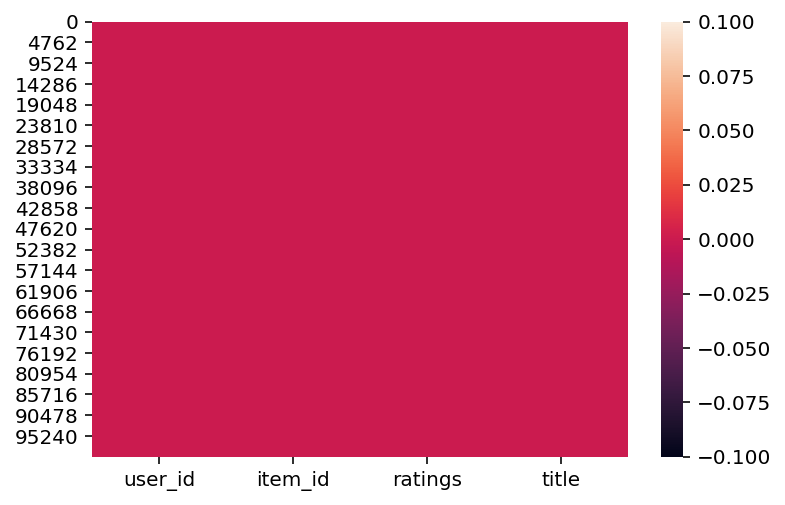

In [10]:
sns.heatmap(df_merged.isnull()==True)

In [11]:
movie_df=rating_data.pivot_table(index='item_id',columns='user_id',values='ratings').fillna(0)

movie_df.shape


(1682, 943)

creating a  sparse matrix and 

In [12]:
from scipy.sparse import csr_matrix
movie_df_feature_matrix=csr_matrix(movie_df.values)

from sklearn.neighbors import NearestNeighbors

model_knn=NearestNeighbors(metric='cosine',algorithm='brute')
model_knn.fit(movie_df_feature_matrix)


NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [13]:
print(movie_df_feature_matrix)

  (0, 0)	5.0
  (0, 1)	4.0
  (0, 4)	4.0
  (0, 5)	4.0
  (0, 9)	4.0
  (0, 12)	3.0
  (0, 14)	1.0
  (0, 15)	5.0
  (0, 16)	4.0
  (0, 17)	5.0
  (0, 19)	3.0
  (0, 20)	5.0
  (0, 22)	5.0
  (0, 24)	5.0
  (0, 25)	3.0
  (0, 37)	5.0
  (0, 40)	4.0
  (0, 41)	5.0
  (0, 42)	5.0
  (0, 43)	4.0
  (0, 44)	5.0
  (0, 48)	2.0
  (0, 53)	4.0
  (0, 55)	4.0
  (0, 56)	5.0
  :	:
  (1661, 781)	4.0
  (1662, 781)	2.0
  (1663, 781)	4.0
  (1663, 838)	1.0
  (1663, 869)	4.0
  (1663, 879)	4.0
  (1664, 781)	2.0
  (1665, 781)	2.0
  (1666, 781)	3.0
  (1667, 781)	3.0
  (1668, 781)	2.0
  (1669, 781)	3.0
  (1670, 786)	1.0
  (1671, 827)	2.0
  (1671, 895)	2.0
  (1672, 834)	3.0
  (1673, 839)	4.0
  (1674, 850)	3.0
  (1675, 850)	2.0
  (1676, 853)	3.0
  (1677, 862)	1.0
  (1678, 862)	3.0
  (1679, 862)	2.0
  (1680, 895)	3.0
  (1681, 915)	3.0


defining a function which will take movie name and give recommendations using ratings for that movie 

In [14]:
def recommender(movie_name,data,model,n_recommendations):
    model.fit(data)
    idx=process.extractOne(movie_name,movies_data['title'])[2]
    print('Recommendations for ',movies_data['title'][idx],'are :')
    print('searching for recommendations........')
    try:
        distances,indices=model_knn.kneighbors(data[idx],n_neighbors=n_recommendations)
        for i in indices:
            print(movies_data['title'][i].where(i!=idx))
    except:
        print('No recommendations for this movie')
recommender('angel baby',movie_df_feature_matrix,model_knn,6)

Recommendations for  Angel Baby (1995) are :
searching for recommendations........
1642                                   NaN
1604                  Love Serenade (1996)
1388                          Mondo (1996)
1255        Designated Mourner, The (1997)
1632    Á köldum klaka (Cold Fever) (1994)
1635            Brothers in Trouble (1995)
Name: title, dtype: object
